# Clasificación Automatizada de Sentimientos en Reseñas de Películas

-----

## Overview

### Descripción

<div style="color: #196CC4;">
Este proyecto consiste en desarrollar un sistema automatizado para filtrar y categorizar reseñas de películas como positivas o negativas. Utilizando un conjunto de datos de reseñas de películas de IMDB con etiquetas predefinidas, se entrenará un modelo de aprendizaje automático para detectar automáticamente las críticas positivas y negativas. 
 </div>

### Objetivo

<div style="color: #196CC4;">
El objetivo principal es implementar un sistema que logre una métrica F1 de al menos 0.85 en la clasificación de reseñas como positivas o negativas, a través del entrenamiento y evaluación de modelos de aprendizaje automático que puedan clasificar correctamente el contenido del texto de la reseña. Esto permitirá automatizar y optimizar el proceso de análisis de sentimientos en el contexto específico de críticas cinematográficas, proporcionando una herramienta útil para la comunidad de aficionados al cine.
 </div>

### Recursos

<div style="color: #196CC4;">
<b>Características</b><br>
▶ tconst - Identificador único para cada título de película<br>
▶ title_type - Tipo de título, como 'movie' o 'short', indicando la categoría del título<br>
▶ primary_title - Título principal de la película<br>
▶ original_title - Título original de la película, en el idioma original si es diferente al título principal<br>
▶ start_year - Año de lanzamiento de la película<br>
▶ end_year - Año de finalización de la película (generalmente "\N" indica que no hay información disponible)<br>
▶ runtime_minutes - Duración en minutos de la película<br>
▶ is_adult - Indicador de si la película es para adultos (1) o no (0)<br>
▶ genres - Géneros de la película<br>
▶ average_rating - Calificación promedio de la película<br>
▶ votes - Número de votos recibidos para la película<br>
▶ review - Texto de la reseña de la película<br>
▶ rating - Clasificación de la reseña (neg para negativa, pos para positiva)<br>
▶ sp - ¿Quizás una abreviatura o código específico relacionado con la clasificación de la reseña?<br>
▶ ds_part - Indicador de si la observación pertenece al conjunto de datos de entrenamiento ('train') o de prueba ('test')<br>
▶ idx - Identificador de índice único para cada observación.![image.png](attachment:image.png)<br>

<b>Objetivo</b><br>
▶ pos - Indicador de si la reseña es positiva (1) o negativa (0)<br>
</div>

### Methodology

<div style="color: #196CC4;">
<ol>
<li>Inicialización y Análisis Exploratorio de Datos
<ul>
<li>Se importan librerías, módulos y el dataset: imdb_reviews.tsv</li>
<li>Se realiza un análisis exploratorio de datos inicial, incluyendo correlaciones, valores faltantes, duplicados y sintaxis.</li>
<li>Se limpia el dataset: se unifican los nombres de las columnas, se tratan los valores faltantes y se ajustan los tipos de datos.</li>
<li>Análisis Exploratorio de Datos
<ul>
<li>Se calcula la estadística descriptiva.</li>
<li>Se eliminan las filas con valores faltantes.</li>
<li>Se simplifica el dataset, eliminando columnas irrelevantes.</li>
<li>Se analiza la distribución de reseñas por película.</li>
<li>Se visualiza la distribución de datos con gráficos KDE.</li>
<li>Se analiza el equilibrio de las clases (positivo/negativo).</li>
<li>Se compara la distribución de calificaciones en los conjuntos de entrenamiento y prueba.</li>
<li>Se analiza la evolución de las reseñas positivas y negativas a lo largo del tiempo.</li>
</ul>
</li>
</ul>
</li>

<li>Preparación de Datos
<ul>
<li>Se crea una función para evaluar el rendimiento de los modelos.</li>
<li>Se normaliza el texto: minúsculas, eliminación de dígitos y signos de puntuación.</li>
<li>Se divide el dataset en conjuntos de entrenamiento y prueba.</li>
</ul>
</li>

<li>Análisis de Sentimiento con Modelos
<ul>
<li>Se utiliza un DummyClassifier como línea base.</li>
<li>Modelo 1: NLTK + TF-IDF + Regresión Logística.</li>
<li>Modelo 2: SpaCy + TF-IDF + Regresión Logística.</li>
<li>Modelo 3: SpaCy + TF-IDF + LightGBM.</li>
<li>Modelo 4: SpaCy + TF-IDF + Random Forest.</li>
<li>Modelo 5: SpaCy + TF-IDF + Grid Search.</li>
</ul>
</li>

<li>Evaluación del Modelo
<ul>
<li>Se comparan las métricas de rendimiento de todos los modelos (Accuracy, F1-Score, ROC AUC).</li>
</ul>
</li>

<li>Análisis de Sentimiento con Nuevas Reseñas
<ul>
<li>Se utiliza un nuevo conjunto de reseñas para evaluar los modelos entrenados.</li>
<li>Se seleccionan reseñas variadas.</li>
<li>Se aplica la función de normalización a las nuevas reseñas.</li>
<li>Se evalúan todos los modelos con las nuevas reseñas.</li>
<li>Se realiza un análisis final de los resultados.</li>
</ul>
</li>

<li>Conclusiones
<ul>
<li>Se analizan los resultados de los modelos.</li>
<li>Se comparan las métricas de rendimiento.</li>
<li>Se selecciona el mejor modelo y se resumen los resultados.</li>
</ul>
</li>
</ol>
</div>

-----

## Información general

### Inicialización

<div style="color: #196CC4;">
▶ Importación de bibliotecas y carga de datos
</div>

In [1]:
# Data analysis
import pandas as pd

# Numerical operations
import numpy as np

# Data visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Attractive data visualization
import seaborn as sns   

# Maths
import math

# Metrics
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Converting textual data into numerical features
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Progress bar
from tqdm.auto import tqdm

# Regular expressions
import re

# Strings
import string

# Natural Language Processing (NLP)
import nltk
import spacy 

# Stopwords
from nltk.corpus import stopwords

# Models
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

<div style="color: #196CC4;">
A continuación se muestra el entorno de visualización de gráficos:<br>
    
▶ <b>%matplotlib inline:</b> habilita la representación de gráficos de matplotlib directamente dentro del cuaderno (notebook) de Jupyter, en lugar de abrir una ventana emergente separada.<br>
▶ <b>%config InlineBackend.figure_format = 'png':</b> configura el formato de las figuras generadas por matplotlib, renderizando en formato PNG. <br>
▶ <b>plt.style.use('seaborn'):</b> establece el estilo de los gráficos generados con 'seaborn', que es un estilo de visualización más moderno y atractivo que los estilos predeterminados de matplotlib. 
    </div>

In [2]:
# Inline data visualization
%matplotlib inline

# PNG visualization
%config InlineBackend.figure_format = 'png'

# Better quality for HiDPI
# %config InlineBackend.figure_format = 'retina'

# Modern visualization
plt.style.use('seaborn-v0_8')

<div style="color: #196CC4;">
A continuación se muestra el monitoreo de tiempo y recursos para completar operaciones complejas en grandes conjuntos de datos.<br>
    
▶ <b>Uso de tqdm:</b> barra de progreso visual durante iteraciones largas o realización de operaciones que pueden tomar mucho tiempo.<br>
▶ <b>progress_apply en Pandas:</b> útil para operaciones que involucran manipulación intensiva de datos que podrían tomar un tiempo considerable. 
      </div>

In [3]:
# Progress bar
tqdm.pandas()

In [4]:
# Import data
df_reviews = pd.read_csv('datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

# *Data provided by Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. 

### Despliegue de dataset

<div style="color: #196CC4;">
▶ Propiedades generales del Dataframe
</div>

In [5]:
# General Dataframe properties
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

<div style="color: #196CC4;">
▶ Vistazo general del Dataframe
</div>

In [6]:
display(df_reviews.head(10))

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281
5,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,This is the first movie I've seen from Singapo...,9,pos,1,test,9282
6,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Yes non-Singaporean's can't see what's the big...,9,pos,1,test,9283
7,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,This true story of Carlson's Raiders is more o...,2,neg,0,train,9903
8,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,Should have been titled 'Balderdash!' Little i...,2,neg,0,train,9905
9,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,The movie 'Gung Ho!': The Story of Carlson's M...,4,neg,0,train,9904


<div style="color: #196CC4;">
▶ Estadísticas descriptivas para los datos numéricos.
</div>

In [7]:
# Descriptive statistics
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,47329.0,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,25562.917323,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,83670.039163,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.0,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,827.0,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3197.0,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,13974.0,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1739448.0,10.000000,1.000000,12499.000000


<div style="color: #196CC4;">
▶ Verificación de valores duplicados.
</div>

In [8]:
# Duplicated values
review_duplicates = df_reviews.duplicated()

# Sum of duplicated values
total_review_duplicates = review_duplicates.sum()

# Duplicated rows
review_duplicates_rows = df_reviews[review_duplicates]

# Display data
print("Total de filas duplicadas:")
print(total_review_duplicates)
#print()
#print("Listado de aquellas filas duplicadas:")
#display(review_duplicates_rows)

Total de filas duplicadas:
0


In [9]:
# Identify duplicates
duplicates_reviews = df_reviews.duplicated(subset=['review'])

# Sum
num_duplicates_reviews = duplicates_reviews.sum()

# Print
print(f"Número de registros duplicados en 'review': {num_duplicates_reviews}")

Número de registros duplicados en 'review': 91


<div style="color: #196CC4;">
▶ Sabemos que la serie 'tconst' es el identificador único para cada título de película, por lo que a lo largo de los 47331 registros, filas o reseñas en este DataFrame, podemos identificar el número total de producciones que se están valorando 
</div>

In [10]:
# Unique values
num_unique_tconst = df_reviews['tconst'].nunique()
print(f"Número de valores únicos (tconst) o cantidad total de películas: {num_unique_tconst}")

Número de valores únicos (tconst) o cantidad total de películas: 6648


### Observaciones iniciales

<div style="color: #196CC4;">
▶ Los nombres de las Series están en minúsculas, lo cual ayuda a manejar correctamente los datos<br>
▶ No hay filas duplicadas<br>
▶ Existen 91 valores duplicados en la Serie "reviews"<br>
▶ Existen valores ausentes en "average_rating" y "votes"<br>
▶ De acuerdo a la estadística descriptiva, no se observa discrepancia pronunciada o valores atípicos en los mínimos máximos o en promedios<br><br>
▶ Series que no influyen en el propósito de este proyecto, ya que no son críticos para el análisis de sentimientos y tampoco afectan de manera directa la clasificación de las reseñas:<br>
    <ul>
        <li>title_type: Tipo de título, como 'movie' o 'short', indicando la categoría del título</li>
        <li>primary_title: Título principal de la película</li>
        <li>original_title: Título original de la película, en el idioma original si es diferente al título principal</li>
        <li>start_year: Año de lanzamiento de la película</li>
        <li>end_year: Año de finalización de la película </li>
        <li>runtime_minutes: Duración en minutos de la película</li>
        <li>is_adult: Indicador de si la película es para adultos (1) o no (0)</li>
        <li>rating: Clasificación de la reseña (neg para negativa, pos para positiva)</li>
        <li>sp: ¿Quizás una abreviatura o código específico relacionado con la clasificación de la reseña</li>
        <li>idx: Identificador de índice único para cada observación.</li>
    </ul>

</div>

-----

## Análisis Exploratorio de Datos (EDA)

### Limpieza de datos

<div style="color: #196CC4;">
▶ A continuación se eliminan las filas que coinciden con valores ausentes para "average_rating" y "votes" (solo solo 2)
</div>

In [11]:
# Delete rows with NaN
df_reviews = df_reviews.dropna(subset=['average_rating', 'votes'])

<div style="color: #196CC4;">
▶ A continuación se eliminan las filas que coinciden con valores duplicados para "review"
</div>

In [12]:
# Delete rows with 'reviews' duplicates
df_reviews.drop_duplicates(subset=['review'], inplace=True)

### Cantidad de reseñas por películas

<div style="color: #196CC4;">
▶ A continuación se muestra en la primera gráfica de barras, cuántas películas tienen exactamente cada cantidad de reseñas. Por ejemplo, puede mostrar cuántas películas tienen 1 reseña, cuántas tienen 2 reseñas, cuántas tienen 3 reseñas, y así sucesivamente. Esto para entender la cantidad más común de reseñas que reciben las películas en el conjunto de datos.<br>
▶ En el segundo gráfico de Densidad Kernel (KDE) para representar la distribución de datos en forma de una función de densidad de probabilidad suavizada. Esto para identificar tendencias o agrupaciones en la distribución de la cantidad de reseñas.
</div>


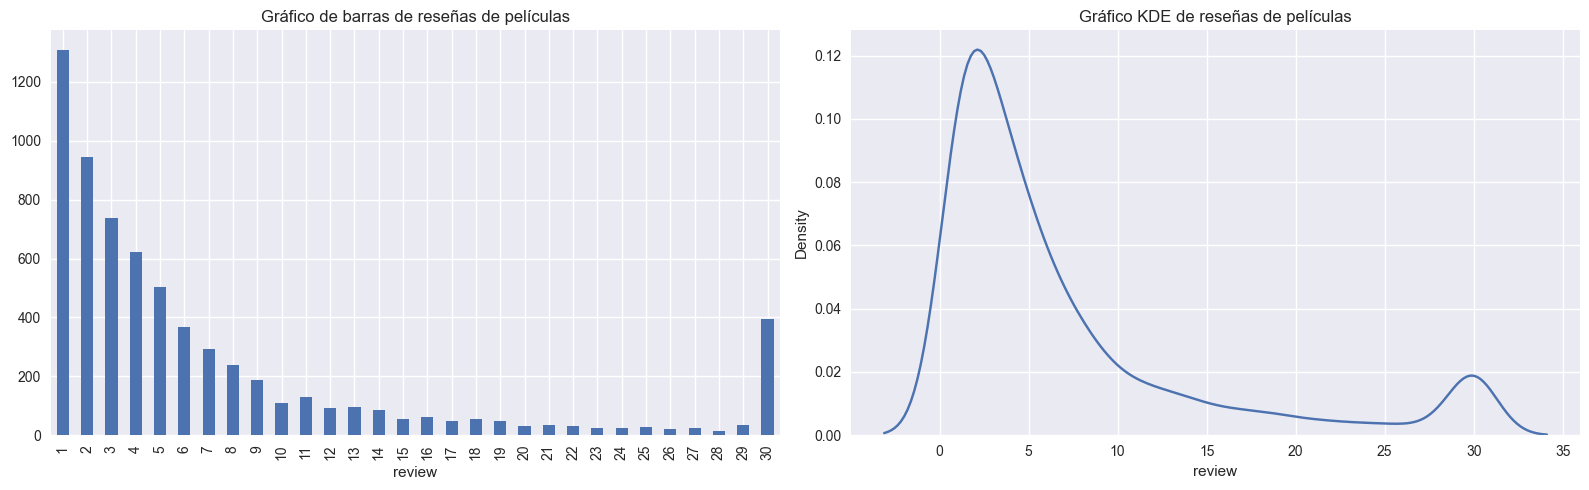

In [13]:
# Plot creation (2 rows, 1 column)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Subplot 1: Bar plot 
ax = axs[0]
# Group by 'tconst', count the number of reviews per movie, then count how many movies have the same number of reviews
dft = df_reviews.groupby('tconst')['review'].count().value_counts().sort_index()
# Create bar plot
dft.plot.bar(ax=ax)
# Title
ax.set_title('Gráfico de barras de reseñas de películas')

# Subplot 2: KDE plot
ax = axs[1]
# Number of reviews per movie by grouping by 'tconst'
dft = df_reviews.groupby('tconst')['review'].count()
# Create kernel density estimate (KDE)
sns.kdeplot(dft, ax=ax)
# Title
ax.set_title('Gráfico KDE de reseñas de películas')

# Adjust subplot
fig.tight_layout()


### Equilibrio de clases

<div style="color: #196CC4;">
▶ A continuación se muestra la distribución de clases en el conjunto de datos, mostrando información cuantitativa sobre la frecuencia de cada etiqueta en la columna 'pos', lo cual es fundamental para entender la distribución de los datos y para la preparación adecuada del análisis o del modelo de datos.</div>

In [14]:
# Value count
pos_value_counts = df_reviews['pos'].value_counts()
pos_value_counts

pos
0    23680
1    23558
Name: count, dtype: int64

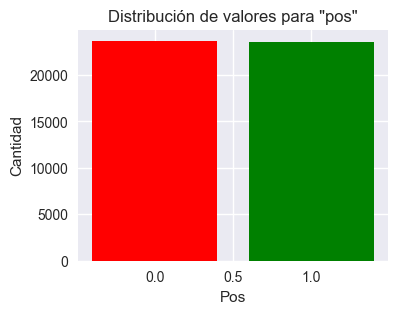

In [15]:
# Plot size
plt.figure(figsize=(4, 3)) 

# Bars definition
bars = plt.bar(pos_value_counts.index, pos_value_counts.values, color=['red', 'green'])

# Labels
plt.title('Distribución de valores para "pos"')
plt.xlabel('Pos')
plt.ylabel('Cantidad')

# Print
plt.show()

<div style="color: #196CC4;">
▶ Dado que la distribución de las clases es bastante equilibrada con 23,715 registros para la clase 0 y 23,616 registros para la clase 1, no sería necesario abordar el problema del desequilibrio de clases en este proyecto.</div>

### Distribución calificaciones (test / train)

<div style="color: #196CC4;">
▶ A continuación se muestra la distribución de las calificaciones dentro de diferentes subconjuntos de entrenamiento y prueba utilizadas en el análisis de este proyecto.</div>

In [16]:
# Training data
dft_train = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft_train = dft_train.reindex(index=np.arange(min(dft_train.index.min(), 1), max(dft_train.index.max(), 11))).fillna(0)

# Test data
dft_test = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft_test = dft_test.reindex(index=np.arange(min(dft_test.index.min(), 1), max(dft_test.index.max(), 11))).fillna(0)

# DataFrame
df_table = pd.DataFrame({
    'Rating': np.arange(1, 11),
    'Train Count': dft_train.values,
    'Test Count': dft_test.values
})

# Print
print(df_table)

   Rating  Train Count  Test Count
0       1       4856.0      4718.0
1       2       2154.0      2181.0
2       3       2314.0      2388.0
3       4       2571.0      2498.0
4       5          0.0         0.0
5       6          0.0         0.0
6       7       2390.0      2197.0
7       8       2874.0      2692.0
8       9       2145.0      2187.0
9      10       4453.0      4620.0


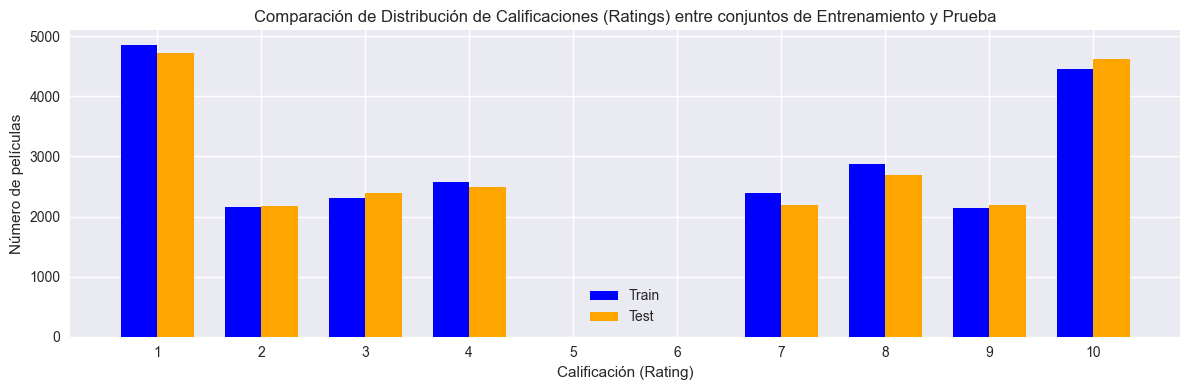

In [17]:
# Figure
fig, ax = plt.subplots(figsize=(12, 4))

# Width
bar_width = 0.35

# Positions for train and test bars
r1 = np.arange(len(df_table))
r2 = [x + bar_width for x in r1]

# Bars
ax.bar(r1, df_table['Train Count'], color='blue', width=bar_width, label='Train')
ax.bar(r2, df_table['Test Count'], color='orange', width=bar_width, label='Test')

# Tags
ax.set_xlabel('Calificación (Rating)')
ax.set_ylabel('Número de películas')
ax.set_title('Comparación de Distribución de Calificaciones (Ratings) entre conjuntos de Entrenamiento y Prueba')
ax.set_xticks(r1 + bar_width / 2)
ax.set_xticklabels(df_table['Rating'])

# Legends
ax.legend()

# Plot
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
▶ Se observa que hay una distribución similar entre los conjuntos de entrenamiento y prueba para la mayoría de las calificaciones, por lo que tampoco hay diferencias significativas en la cantidad de películas con ciertas calificaciones entre los dos conjuntos. Esto también nos ayuda a validar la consistencia de las distribuciones de calificaciones entre el conjunto de entrenamiento y prueba<br>
▶ No hay películas con las calificaciones 5 y 6 en el dataset para ninguno de los dos conjuntos
</div>

### Distribución de reseñas (-, +)

<div style="color: #196CC4;">
▶ Veamos el número de películas y reseñas a lo largo de los años.
</div>

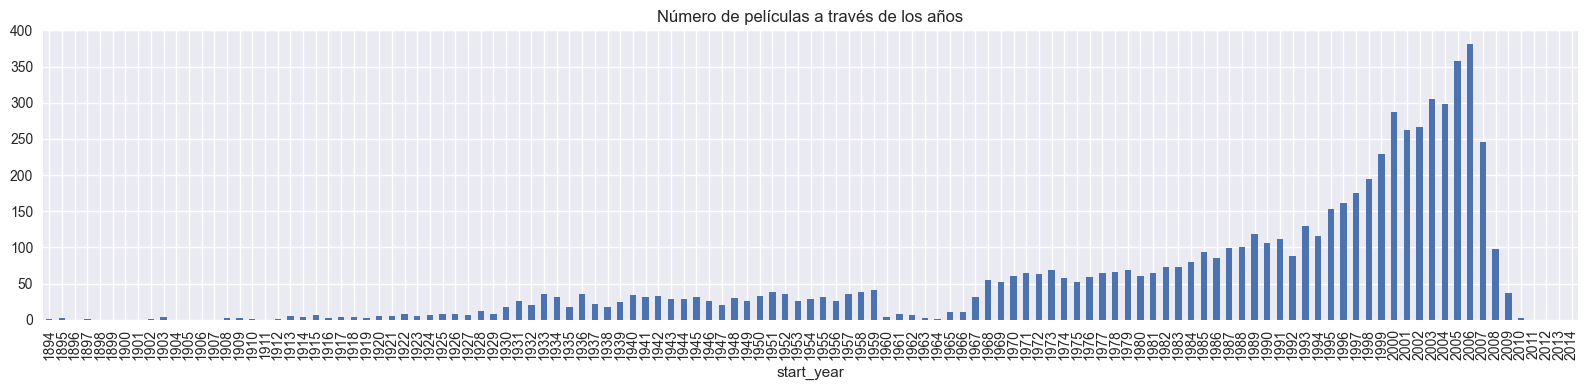

In [18]:
# Plot creation (1 row, 1 column)
fig, ax = plt.subplots(1, 1, figsize=(16, 4))

# Count unique movies per year
dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates()['start_year'].value_counts().sort_index()

# All years from the minimum to 2015 | Fill missing years with 0
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2015))).fillna(0)

# Bar Plot & Title
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a través de los años')

# Adjust subplot
fig.tight_layout()

# Print
plt.show()

<div style="color: #196CC4;">
▶ Ahora veamos la distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos (entrenamiento y pruebas)
</div>

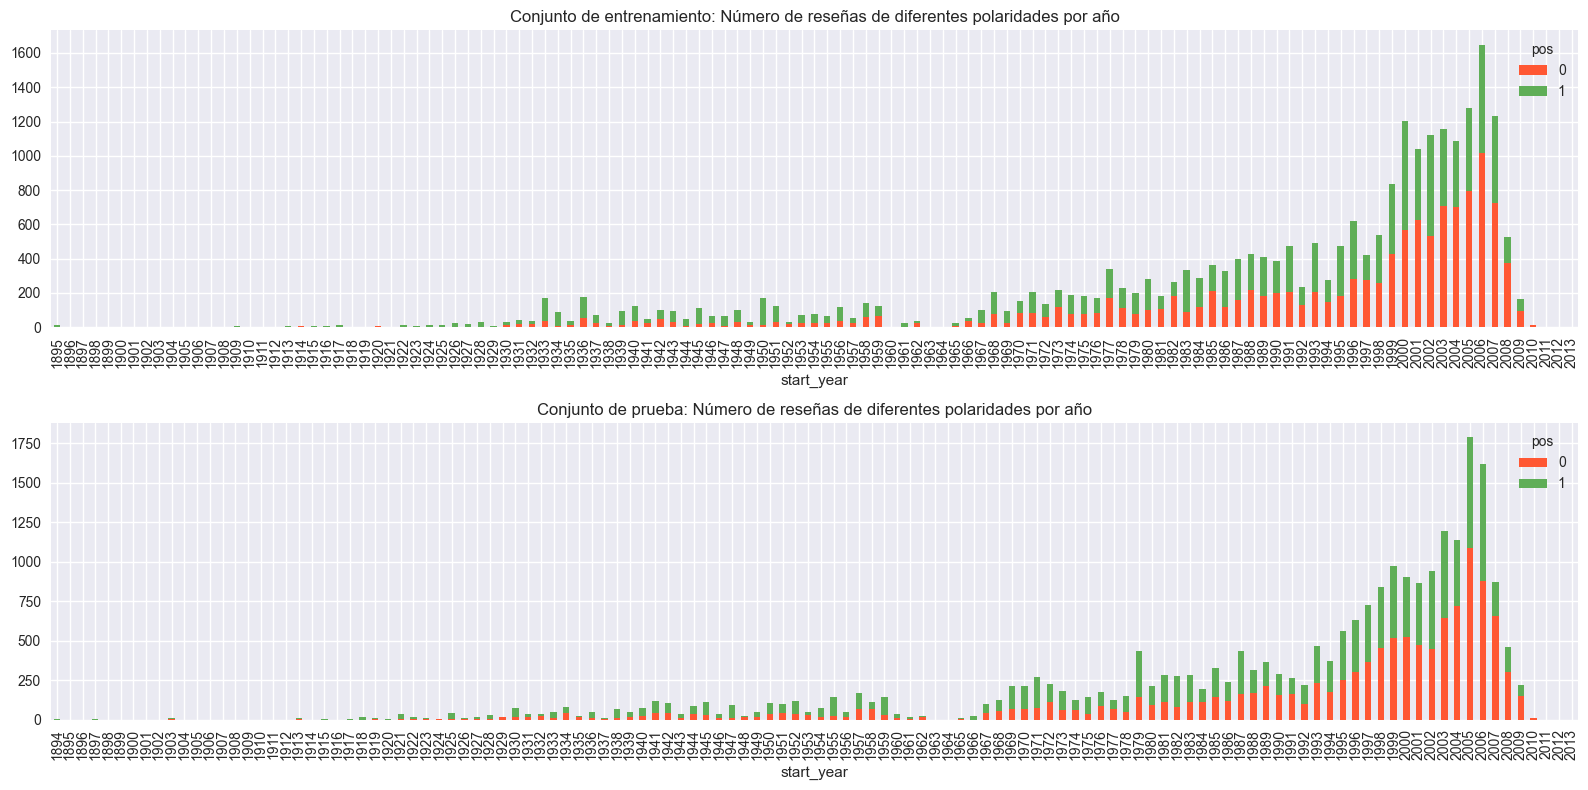

In [19]:
# # Plot creation (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

# -------------------------------------------

# Subplot 1 (Train)
ax = axs[0]

# Group by 'start_year' and 'pos' | Count reviews | Unstack 'pos'
dft_train = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()

# Convert index to int
dft_train.index = dft_train.index.astype('int')

# Reindex to fill missing years | Fill NaN values with 0
dft_train = dft_train.reindex(index=np.arange(dft_train.index.min(), max(dft_train.index.max(), 2014))).fillna(0)

# Bar Plot & Title
dft_train.plot(kind='bar', stacked=True, ax=ax, color=['#FF5733', '#5FAE57'])
ax.set_title('Conjunto de entrenamiento: Número de reseñas de diferentes polaridades por año')

# -------------------------------------------

# Subplot 2 (Test)
ax = axs[1]

# Group by 'start_year' and 'pos' | Count reviews | Unstack 'pos'
dft_test = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()

# Convert index to int
dft_test.index = dft_test.index.astype('int')

# Reindex to fill missing years | Fill NaN values with 0
dft_test = dft_test.reindex(index=np.arange(dft_test.index.min(), max(dft_test.index.max(), 2014))).fillna(0)

# Bar Plot & Title
dft_test.plot(kind='bar', stacked=True, ax=ax, color=['#FF5733', '#5FAE57'])
ax.set_title('Conjunto de prueba: Número de reseñas de diferentes polaridades por año')

# -------------------------------------------

# Adjust subplot
fig.tight_layout()

# Print
plt.show()


### Distribución KDE

<div style="color: #196CC4;">
▶ Esta visualización ayuda a entender la distribución de las críticas según su polaridad (positiva o negativa) en diferentes conjuntos de datos divididos por año y por película<br>
▶ Tanto la gráfica superior (conjunto de entrenamiento) como la inferior (conjunto de prueba) muestran mucha similitud y consistencia en distribución de críticas a lo largo de los años y también en cuanto a polaridad de las mismas.</div>


Distribución de reviews por película



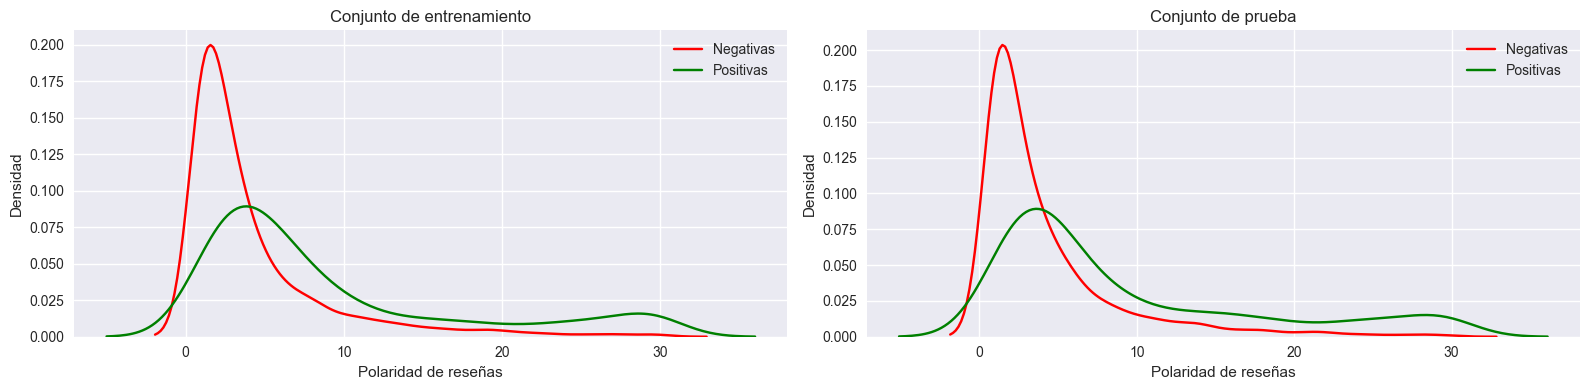

In [20]:
print()
print("Distribución de reviews por película")
print()

# -------------------------------------------

# Plot creation (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# -------------------------------------------

# Subplot 1
ax = axs[0]

# Count reviews | Unstack and separate columns for 'neg' and 'pos'
dft_train = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()

# Plot KDE plot using Seaborn (default Gaussian kernel)
sns.kdeplot(dft_train[0], color='red', label='Negativas', ax=ax)
sns.kdeplot(dft_train[1], color='green', label='Positivas', ax=ax)

# Legends and Title
ax.legend()
ax.set_title('Conjunto de entrenamiento')

# Labels
ax.set_xlabel('Polaridad de reseñas')
ax.set_ylabel('Densidad')

# -------------------------------------------

# Subplot 2
ax = axs[1]

# Count reviews | Unstack and separate columns for 'neg' and 'pos'
dft_test = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()

# Plot KDE plot using Seaborn (default Gaussian kernel)
sns.kdeplot(dft_test[0], color='red', label='Negativas', ax=ax)
sns.kdeplot(dft_test[1], color='green', label='Positivas', ax=ax)

# Legends and Title
ax.legend()
ax.set_title('Conjunto de prueba')

# Labels
ax.set_xlabel('Polaridad de reseñas')
ax.set_ylabel('Densidad')

# -------------------------------------------

# Adjust subplot
fig.tight_layout()

# Print
plt.show()

<div style="color: #196CC4;">
▶ Estos gráficos KDE de reseñas negativas y positivas por película en diferentes conjuntos de datos (entrenamiento y prueba), facilitan la comparación visual entre las distribuciones. <br>
▶ Se observan claras similitudes en la distribución de las polaridades entre los dos conjuntos de datos (entrenamiento y prueba), con concentraciones de datos (reseñas) entre los valores 1 y 5, predominando las reseñas negativas sobre las positivas</div>

### Simplificación de conjuntos de datos

<div style="color: #196CC4;">
▶ A continuación se eliminan las series que no influyen en el propósito del proyecto
</div>

In [21]:
# List of series
columns_to_drop = ['genres', 'tconst', 'title_type', 'primary_title', 'original_title', 'start_year', 
                   'end_year', 'runtime_minutes', 'is_adult', 'rating', 'sp', 'idx']

# Copy DataFrame
df_simplified = df_reviews.copy()

# Drop
df_simplified.drop(columns=columns_to_drop, inplace=True)

# Verify columns
print(df_simplified.columns)


Index(['average_rating', 'votes', 'review', 'pos', 'ds_part'], dtype='object')


<div style="color: #196CC4;">
▶ Ahora se muestran los detalles del DataFrame original y posteriormente del simplificado
</div>

In [22]:
# Original DataFrame properties
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47238 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47238 non-null  object 
 1   title_type       47238 non-null  object 
 2   primary_title    47238 non-null  object 
 3   original_title   47238 non-null  object 
 4   start_year       47238 non-null  int64  
 5   end_year         47238 non-null  object 
 6   runtime_minutes  47238 non-null  object 
 7   is_adult         47238 non-null  int64  
 8   genres           47238 non-null  object 
 9   average_rating   47238 non-null  float64
 10  votes            47238 non-null  Int64  
 11  review           47238 non-null  object 
 12  rating           47238 non-null  int64  
 13  sp               47238 non-null  object 
 14  pos              47238 non-null  int64  
 15  ds_part          47238 non-null  object 
 16  idx              47238 non-null  int64  
dtypes: Int64(1), floa

<div style="color: #196CC4;">
▶ El DataFrame simplificado ayudará a agilizar la etapa de entrenamiento
</div>

In [23]:
# Simplified DataFrame properties
df_simplified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47238 entries, 0 to 47330
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   average_rating  47238 non-null  float64
 1   votes           47238 non-null  Int64  
 2   review          47238 non-null  object 
 3   pos             47238 non-null  int64  
 4   ds_part         47238 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [24]:
df_simplified

,average_rating,votes,review,pos,ds_part
0,6.3,2218,The pakage implies that Warren Beatty and Gold...,0,train
1,6.3,2218,How the hell did they get this made?! Presenti...,0,train
2,6.3,184,There is no real story the film seems more lik...,0,test
3,6.3,184,Um .... a serious film about troubled teens in...,1,test
4,6.3,184,I'm totally agree with GarryJohal from Singapo...,1,test
...,...,...,...,...,...
47326,7.7,2254,This is another of my favorite Columbos. It sp...,1,test
47327,7.3,278,Talk about being boring! I got this expecting ...,0,test
47328,7.3,278,"I never thought I'd say this about a biopic, b...",1,test
47329,7.3,278,Spirit and Chaos is an artistic biopic of Miya...,1,test


-----

## Preparación de datos

### Procedimiento de evaluación

<div style="color: #196CC4;">
▶ A continuación se muestra la función para evaluar el rendimiento de los modelos que se estarán utilizando en este proyecto
</div>

In [25]:
# Metrics function
def evaluate_model(model, train_features, train_target, test_features, test_target):

    # Inicializer
    eval_stats = {}

    # Predictions
    train_pred = model.predict(train_features)
    test_pred = model.predict(test_features)

    # -------------------------------------------   
    
    # Probabilities for ROC AUC
    
    # Check if it's a LightGBM model
    if isinstance(model, lgb.Booster):  
        # Predictions to probabilities (decision threshold)
        train_proba = (train_pred > 0.5).astype(int)
        test_proba = (test_pred > 0.5).astype(int)
        
        # Predicted probabilities to integers
        train_pred = np.round(train_pred).astype(int)  
        test_pred = np.round(test_pred).astype(int)  
    else:
        # Use predict_proba for other models if needed
        train_proba = model.predict_proba(train_features)[:, 1]
        test_proba = model.predict_proba(test_features)[:, 1]

    # Metrics 'train'
    eval_stats['train'] = {
        'Accuracy': accuracy_score(train_target, train_pred),
        'F1': f1_score(train_target, train_pred),
        'ROC AUC': roc_auc_score(train_target, train_proba)
    }
    
    # Metrics 'test'
    eval_stats['test'] = {
        'Accuracy': accuracy_score(test_target, test_pred),
        'F1': f1_score(test_target, test_pred),
        'ROC AUC': roc_auc_score(test_target, test_proba)
    }
    
    # -------------------------------------------
    
    # Create DataFrame from eval_stats
    df_eval_stats = pd.DataFrame(eval_stats)

    # Round values
    df_eval_stats = df_eval_stats.round(4)

    # Rename columns
    df_eval_stats = df_eval_stats.rename(columns={'train': 'Train', 'test': 'Test'})

    # -------------------------------------------    
    
    # Print
    print(df_eval_stats)

    # Return
    return df_eval_stats

### Normalización

<div style="color: #196CC4;">
▶ Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.
</div>

In [26]:
def preprocess_text(text):
    # Convert to lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())

    # Remove special characters (emoticons, emojis, etc.)
    text = re.sub(r'[^\w\s\d]', '', text)

    # Remove extra blank spaces
    text = ' '.join(text.split())

    # Tokenize and normalize (lemmatize) with spaCy
    #doc = nlp(text)
    #lemmas = [token.lemma_ for token in doc]

    # Return
    return text

<div style="color: #196CC4;">
▶ Ahora se procesan todas las reseñas del DataFrame
</div>

In [27]:
# Apply preprocessing to reviews
df_simplified['review_norm'] = df_simplified['review'].apply(preprocess_text)

<div style="color: #196CC4;">
▶ A continuación se verifica que la normalización se aplica de manera adecuada, tomando como ejemplo la primera reseña de la Serie
</div>

In [28]:
# Access the first review
first_review = df_simplified['review'].iloc[0]  

# Print review without processing
print(df_simplified['review'].iloc[0])
print()

# Preprocess
normalized_review = preprocess_text(first_review)

# Print the normalized review
print("Normalized First Review:", normalized_review)

The pakage implies that Warren Beatty and Goldie Hawn are pulling off a huge bank robbery, but that's not what I got out of it! I didn't get anything! In the first half there's a new character (without introduction) in every other scene. The first half-hour is completely incomprehensible, the rest is just one long, annoying, underlit chase scene. There's always an irritating sound in the background whether it's a loud watch ticking, a blaring siren, a train whistling, or even the horrible score by Quincy Jones. There are a lot of parts that are laughably bad, too. Like, the bad guys chasing Beatty on thin ice with a CAR! Or, the police arriving at the scene roughly fifteen times. I really hated this movie!

Normalized First Review: the pakage implies that warren beatty and goldie hawn are pulling off a huge bank robbery but thats not what i got out of it i didnt get anything in the first half theres a new character without introduction in every other scene the first halfhour is complet

### División entrenamiento / prueba

<div style="color: #196CC4;">
▶ Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.
</div>


In [29]:
# Filter for training data
df_reviews_train = df_simplified.query('ds_part == "train"').copy()
df_reviews_train['review_norm'] = df_reviews_train['review'].apply(preprocess_text)

# Filter for testing data
df_reviews_test = df_simplified.query('ds_part == "test"').copy()
df_reviews_test['review_norm'] = df_reviews_test['review'].apply(preprocess_text)

# Extract features (preprocessed reviews) and target variables
train_features = df_reviews_train['review_norm']
train_target = df_reviews_train['pos']

test_features = df_reviews_test['review_norm']
test_target = df_reviews_test['pos']

# Print shapes
print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23757, 6)
(23481, 6)


-----

## Análisis de sentimiento con modelos

### Modelo 0 - Constante

<div style="color: #196CC4;">
▶ <b>DummyClassifier</b> predice la etiqueta de clase que aparece con mayor frecuencia en los datos de entrenamiento para su variable objetivo 'pos'. Esto es una referencia para evaluar qué tan bien funcionan sus modelos más complejos.</div>

In [30]:
# DummyClassifier inicializer
dummy_clf = DummyClassifier(strategy='constant', constant=1)

# Train the model (no actual training happens for DummyClassifier)
dummy_clf.fit(train_features, train_target)

DummyClassifier(constant=1, strategy='constant')

In [31]:
# Metrics
m0_stats = evaluate_model(dummy_clf, train_features, train_target, test_features, test_target)

           Train    Test
Accuracy  0.4993  0.4981
F1        0.6660  0.6650
ROC AUC   0.5000  0.5000


### Modelo 1 - NLTK + TF-IDF + LR|

<div style="color: #196CC4;">
A continuación se preparan los datos de texto para el análisis de sentimiento utilizando el preprocesamiento de texto, la vectorización TF-IDF y un modelo de regresión logística:<br>
▶ <b>NLTK</b> Es una colección de herramientaspara PNL, que proporciona mayor flexibilidad para construir flujos de trabajo personalizados.<br>
▶ <b>TF-IDF (Term Frequency-Inverse Document Frequency)</b> es una técnica común para representar datos de texto numéricamente. Considera tanto la frecuencia de una palabra en un documento como su rareza general en todo el conjunto de datos.<br>
▶ <b>Regresión Logística</b> es un algoritmo de aprendizaje automático utilizado para tareas de clasificación binaria, lo que lo hace adecuado para el análisis de sentimiento (positivo o negativo).
</div>

In [32]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dguez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
def preprocess_text_nltk(text):
    # Convert to lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())

    # Remove special characters (emoticons, emojis, etc.)
    text = re.sub(r'[^\w\s\d]', '', text)

    # Tokenizer(split into words)
    words = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]

    # Join words
    preprocessed_text = ' '.join(words)

    return preprocessed_text

In [34]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dguez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
# Preprocess training and testing data
train_features_joined = [preprocess_text_nltk(text) for text in train_features]
test_features_joined = [preprocess_text_nltk(text) for text in test_features]

# TF-IDF vectorizer
vectorizer1 = TfidfVectorizer()

# Transform training and testing data into TF-IDF features
train_features_tfidf = vectorizer1.fit_transform(train_features_joined)
test_features_tfidf = vectorizer1.transform(test_features_joined)

# Logistic Regression model
model1 = LogisticRegression()

# Train
model1.fit(train_features_tfidf, train_target)

LogisticRegression()

In [36]:
# Metrics
print("Modelo 1 - NLTK, TF-IDF y LR:")
print()
m1_stats = evaluate_model(model1, train_features_tfidf, train_target, test_features_tfidf, test_target)

Modelo 1 - NLTK, TF-IDF y LR:

           Train    Test
Accuracy  0.9394  0.8853
F1        0.9398  0.8849
ROC AUC   0.9841  0.9530


### Modelo 2 - SpaCy + TF-IDF + LR

<div style="color: #196CC4;">
▶ A continuación se realiza un análisis de sentimiento utilizando un modelo de <b>Regresión Logística</b>, similar al ejemplo anterior, pero con spaCy para el preprocesamiento y la vectorización <b>TF-IDF</b>:<br> 
▶ Este ejemplo utiliza <b>spaCy</b> para el preprocesamiento (PNL), con un análisis lingüístico más avanzadas en comparación con el tokenizador de NLTK.<br>
▶ El resto del código (vectorización TF-IDF, regresión logística y evaluación) sigue siendo similar.
</div>

In [37]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [38]:
def preprocess_text_spacy(text):
    # Convert to lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())

    # Remove special characters (emoticons, emojis, etc.)
    text = re.sub(r'[^\w\s\d]', '', text)
    
    # Tokenizer SpaCy
    doc = nlp(text) 
    
    # Lowercase, remove stopwords
    words = [token.text.lower() for token in doc if not token.is_stop]  
    
    # Join words
    preprocessed_text = ' '.join(words)  
    
    # Return
    return preprocessed_text

In [39]:
# Preprocess training and testing data
train_features_joined = [preprocess_text_spacy(text) for text in train_features]
test_features_joined = [preprocess_text_spacy(text) for text in test_features]

# TF-IDF vectorizer
vectorizer2 = TfidfVectorizer()

# Transform training and testing data into TF-IDF features
train_features_tfidf = vectorizer2.fit_transform(train_features_joined)
test_features_tfidf = vectorizer2.transform(test_features_joined)

In [40]:
# Logistic Regression model
model2 = LogisticRegression()

# Train
model2.fit(train_features_tfidf, train_target)

LogisticRegression()

In [41]:
# Metrics
print("Modelo 2 - spaCy, TF-IDF y LR:")
print()
m2_stats = evaluate_model(model2, train_features_tfidf, train_target, test_features_tfidf, test_target)

Modelo 2 - spaCy, TF-IDF y LR:

           Train    Test
Accuracy  0.9394  0.8790
F1        0.9398  0.8785
ROC AUC   0.9832  0.9501


### Modelo 3 - SpaCy + TF-IDF + LGBM

<div style="color: #196CC4;">
▶ A continuación se realiza análisis de sentimiento utilizando <b>LightGBM (LGBM)</b>, un modelo de aprendizaje automático para tareas de clasificación, por lo que se clasifican las reseñas como positivas o negativas en función de las representaciones de características aprendidas.<br>  
▶ <b>LGBM</b> se basa en el algoritmo de boosting de gradiente, que entrena un modelo de forma iterativa para mejorar gradualmente el rendimiento.<br>
▶ Este ejemplo sigue utilizando <b>spaCy</b> para el preprocesamiento, así como la vectorización con <b>TF-IDF</b> y evaluación
</div>

In [42]:
# LightGBM model
lgb_train = lgb.Dataset(train_features_tfidf, label=train_target)
lgb_test = lgb.Dataset(test_features_tfidf)

In [43]:
# Parameters
params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_child_samples': 20,
    'bagging_fraction': 0.8,
    'feature_fraction': 0.9,
    'bagging_freq': 5,
    #'device': 'gpu'  # Use GPU if available
}

# Train
model3 = lgb.train(params, lgb_train, num_boost_round=100)

# Predictions
#predictions = gbm.predict(test_features_tfidf)

[LightGBM] [Info] Number of positive: 11862, number of negative: 11895
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.366148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 479908
[LightGBM] [Info] Number of data points in the train set: 23757, number of used features: 11498
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499305 -> initscore=-0.002778
[LightGBM] [Info] Start training from score -0.002778


In [44]:
# Metrics
print("Modelo 3 - spaCy, TF-IDF y LGBM:")
print()
m3_stats = evaluate_model(model3, train_features_tfidf, train_target, test_features_tfidf, test_target)

Modelo 3 - spaCy, TF-IDF y LGBM:

           Train    Test
Accuracy  0.9098  0.8624
F1        0.9109  0.8636
ROC AUC   0.9099  0.8625


### Modelo 4 - SpaCy + TF-IDF + RF

<div style="color: #196CC4;">
▶ A continuación se configura un modelo <b>Random Forest</b> con parámetros específicos para clasificar las reseñas en base al análisis de sentimiento. <br>
▶ Este modelo <b>Random Forest</b> se basa en la creación de un conjunto de árboles de decisión, para obtener un resultado final más robusto y preciso.<br>
▶ Este ejemplo sigue utilizando <b>spaCy</b> para el preprocesamiento, así como la vectorización con <b>TF-IDF</b> y evaluación
</div>

In [45]:
# Parameters
model_params = {
    'n_estimators': 100,  # Number of trees
    'max_depth': 5,        # Maximum depth of trees
    'random_state': 0      # Set random seed for reproducibility
}

# Train
model4 = RandomForestClassifier(**model_params)
model4.fit(train_features_tfidf, train_target)

# Predictions
#predictions = model.predict(test_features_tfidf)

RandomForestClassifier(max_depth=5, random_state=0)

In [46]:
# Metrics
print("Modelo 4 - SpaCy, TF-IDF y Random Forest:")
print()
m4_stats = evaluate_model(model4, train_features_tfidf, train_target, test_features_tfidf, test_target)

Modelo 4 - SpaCy, TF-IDF y Random Forest:

           Train    Test
Accuracy  0.8275  0.8055
F1        0.8323  0.8090
ROC AUC   0.9057  0.8825


### Modelo 5 - SpaCy + TF-IDF + GS

<div style="color: #196CC4;">
▶ A continuación utiliza la <b>Búsqueda Cruzada (Grid Search)</b> para automatizar la selección de los mejores hiperparámetros para un modelo <b>Random Forest</b> en la tarea de análisis de sentimiento. <br>
▶ El proceso evalúa exhaustivamente distintas configuraciones del modelo y elige la que ofrece el mejor desempeño en un esquema de validación cruzada.<br>
▶ Este ejemplo sigue utilizando <b>spaCy</b> para el preprocesamiento, así como la vectorización con <b>TF-IDF</b> y evaluación
</div>

In [47]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 7],          
    'random_state': [0]              
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(train_features_tfidf, train_target)

# Best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
predictions = best_model.predict(test_features_tfidf)

In [48]:
# Best params
print("Mejores parámetros:", best_params)

Mejores parámetros: {'max_depth': 7, 'n_estimators': 200, 'random_state': 0}


In [49]:
# Metrics
print("Modelo 5 - spaCy, TF-IDF y Grid Search:")
print()
m5_stats = evaluate_model(best_model, train_features_tfidf, train_target, test_features_tfidf, test_target)

Modelo 5 - spaCy, TF-IDF y Grid Search:

           Train    Test
Accuracy  0.8690  0.8378
F1        0.8721  0.8399
ROC AUC   0.9418  0.9153


-----

## Evaluación de modelos

### Resumen de resultados

<div style="color: #196CC4;">
▶ A continuación se muestran las métricas de rendimiento de los cinco modelos diferentes de clasificación de texto para este proyecto de análisis de sentimiento, en el conjunto de entrenamiento (Train) y prueba (Test).

</div>

In [50]:
# Combine all models' stats
all_stats = pd.concat([m1_stats, m2_stats, m3_stats, m4_stats, m5_stats], axis=1)
all_stats.columns = pd.MultiIndex.from_product([['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5'], ['Train', 'Test']])

In [51]:
# Models
print("\n*******\n")
print("Modelo 1: NLTK + TF-IDF + LR")
print("Modelo 2: SpaCy + TF-IDF + LR")
print("Modelo 3: SpaCy + TF-IDF + LGBM")
print("Modelo 4: SpaCy + TF-IDF + Random Forest")
print("Modelo 5: SpaCy + TF-IDF + Grid Search")
print("\n*******\n")

# Print DataFrame
all_stats


*******

Modelo 1: NLTK + TF-IDF + LR
Modelo 2: SpaCy + TF-IDF + LR
Modelo 3: SpaCy + TF-IDF + LGBM
Modelo 4: SpaCy + TF-IDF + Random Forest
Modelo 5: SpaCy + TF-IDF + Grid Search

*******



Modelo 1         Modelo 2         Modelo 3         Modelo 4          \
            Train    Test    Train    Test    Train    Test    Train    Test   
Accuracy   0.9394  0.8853   0.9394  0.8790   0.9098  0.8624   0.8275  0.8055   
F1         0.9398  0.8849   0.9398  0.8785   0.9109  0.8636   0.8323  0.8090   
ROC AUC    0.9841  0.9530   0.9832  0.9501   0.9099  0.8625   0.9057  0.8825   

         Modelo 5          
            Train    Test  
Accuracy   0.8690  0.8378  
F1         0.8721  0.8399  
ROC AUC    0.9418  0.9153

<div style="color: #196CC4;">
▶ A continuación se muestra la preparación de datos para su posterior visualización en el análisis de métricas

</div>

In [52]:
# Data (Accuracy, F1 Score, ROC AUC)
models = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5']
accuracy_train = [all_stats.loc['Accuracy', ('Modelo 1', 'Train')], all_stats.loc['Accuracy', ('Modelo 2', 'Train')], all_stats.loc['Accuracy', ('Modelo 3', 'Train')], all_stats.loc['Accuracy', ('Modelo 4', 'Train')], all_stats.loc['Accuracy', ('Modelo 5', 'Train')] ]
accuracy_test = [all_stats.loc['Accuracy', ('Modelo 1', 'Test')], all_stats.loc['Accuracy', ('Modelo 2', 'Test')], all_stats.loc['Accuracy', ('Modelo 3', 'Test')], all_stats.loc['Accuracy', ('Modelo 4', 'Test')], all_stats.loc['Accuracy', ('Modelo 5', 'Test')] ]
f1_train = [all_stats.loc['F1', ('Modelo 1', 'Train')], all_stats.loc['F1', ('Modelo 2', 'Train')], all_stats.loc['F1', ('Modelo 3', 'Train')], all_stats.loc['F1', ('Modelo 4', 'Train')], all_stats.loc['F1', ('Modelo 5', 'Train')] ]
f1_test = [all_stats.loc['F1', ('Modelo 1', 'Test')], all_stats.loc['F1', ('Modelo 2', 'Test')], all_stats.loc['F1', ('Modelo 3', 'Test')], all_stats.loc['F1', ('Modelo 4', 'Test')], all_stats.loc['F1', ('Modelo 5', 'Test')] ]
roc_auc_train = [all_stats.loc['ROC AUC', ('Modelo 1', 'Train')], all_stats.loc['ROC AUC', ('Modelo 2', 'Train')], all_stats.loc['ROC AUC', ('Modelo 3', 'Train')], all_stats.loc['ROC AUC', ('Modelo 4', 'Train')], all_stats.loc['ROC AUC', ('Modelo 5', 'Train')] ]
roc_auc_test = [all_stats.loc['ROC AUC', ('Modelo 1', 'Test')], all_stats.loc['ROC AUC', ('Modelo 2', 'Test')], all_stats.loc['ROC AUC', ('Modelo 3', 'Test')], all_stats.loc['ROC AUC', ('Modelo 4', 'Test')], all_stats.loc['ROC AUC', ('Modelo 5', 'Test')] ]

### Análisis de Accuracy

<div style="color: #196CC4;">
<b>Definición de Accuracy:</b> <br>
Representa la proporción de predicciones correctas realizadas por el modelo. La precisión ideal es 1.0, una alta precisión indica que el modelo es capaz de identificar correctamente la mayoría de las instancias.  <br>
</div>


*******

Modelo 1: NLTK + TF-IDF + LR
Modelo 2: SpaCy + TF-IDF + LR
Modelo 3: SpaCy + TF-IDF + LGBM
Modelo 4: SpaCy + TF-IDF + Random Forest
Modelo 5: SpaCy + TF-IDF + Grid Search

*******



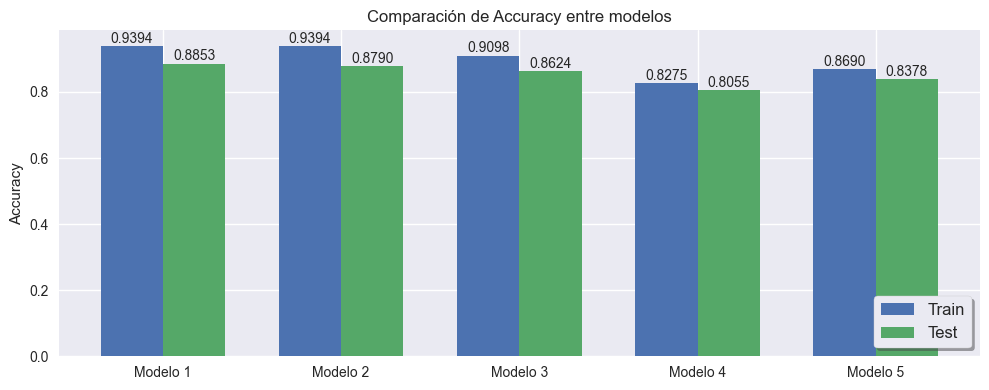

In [53]:
# Models
print("\n*******\n")
print("Modelo 1: NLTK + TF-IDF + LR")
print("Modelo 2: SpaCy + TF-IDF + LR")
print("Modelo 3: SpaCy + TF-IDF + LGBM")
print("Modelo 4: SpaCy + TF-IDF + Random Forest")
print("Modelo 5: SpaCy + TF-IDF + Grid Search")
print("\n*******\n")

# Plot size
plt.figure(figsize=(10, 4))

# Index
ind = np.arange(len(models))
width = 0.35

# Bars definition
bars_train = plt.bar(ind - width/2, accuracy_train, width, label='Train')
bars_test = plt.bar(ind + width/2, accuracy_test, width, label='Test')

# F1 values
for bar, acc_train in zip(bars_train, accuracy_train):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc_train:.4f}', ha='center', va='baseline')

for bar, acc_test in zip(bars_test, accuracy_test):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc_test:.4f}', ha='center', va='baseline')

# Labels
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre modelos')
plt.xticks(ind, models)
plt.legend(loc='lower right', fontsize='large', frameon=True, fancybox=True, shadow=True)

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
<b>Resultados:</b><br>    
▶ Modelo 1 y 2 (LR) alcanzan la mayor precisión general en el entrenamiento (alrededor del 94%).<br>
▶ Siguen el Modelo 3 (LGBM) y el Modelo 5 (Grid Search) con una precisión ligeramente inferior.<br>
▶ El Modelo 4 (Random Forest) muestra la precisión más baja en ambas etapas (entrenamiento y prueba).<br>

<b>El Modelo 1 tiene el mejor desempeño en términos de Accuracy en el conjunto de pruebas, con un valor de 0.8850. Esto indica que, en promedio, el Modelo 1 clasifica correctamente el 88.50% de las instancias en el conjunto de pruebas. </b>
</div>

### Análisis de F1-score

<div style="color: #196CC4;">
<b>Definición de F1-score:</b> <br>
Es una medida que busca encontrar un balance entre la precisión y la revocación (Recall), esta última definida como la proporción de instancias positivas correctamente identificadas por el modelo. El F1-score ideal es 1.0, lo que indica que el modelo tiene un buen equilibrio entre precisión y revocación, indica que el modelo es capaz de identificar correctamente tanto las instancias positivas como las negativas.<br>
</div>


*******

Modelo 1: NLTK + TF-IDF + LR
Modelo 2: SpaCy + TF-IDF + LR
Modelo 3: SpaCy + TF-IDF + LGBM
Modelo 4: SpaCy + TF-IDF + Random Forest
Modelo 5: SpaCy + TF-IDF + Grid Search

*******



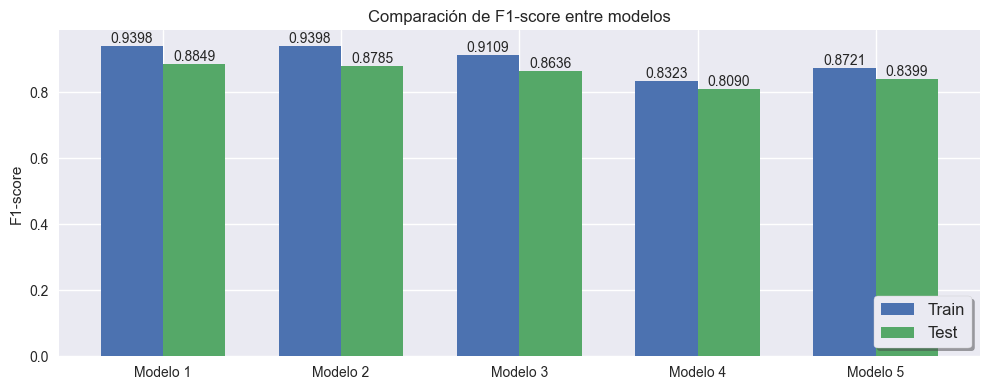

In [54]:
# Models
print("\n*******\n")
print("Modelo 1: NLTK + TF-IDF + LR")
print("Modelo 2: SpaCy + TF-IDF + LR")
print("Modelo 3: SpaCy + TF-IDF + LGBM")
print("Modelo 4: SpaCy + TF-IDF + Random Forest")
print("Modelo 5: SpaCy + TF-IDF + Grid Search")
print("\n*******\n")

# Plot size
plt.figure(figsize=(10, 4))

# Index
ind = np.arange(len(models))
width = 0.35

# Bars definition
bars_train = plt.bar(ind - width/2, f1_train, width, label='Train')
bars_test = plt.bar(ind + width/2, f1_test, width, label='Test')

# F1 values
for bar, f1 in zip(bars_train, f1_train):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{f1:.4f}', ha='center', va='baseline')

for bar, f1 in zip(bars_test, f1_test):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{f1:.4f}', ha='center', va='baseline')

# Labels
plt.ylabel('F1-score')
plt.title('Comparación de F1-score entre modelos')
plt.xticks(ind, models)
plt.legend(loc='lower right', fontsize='large', frameon=True, fancybox=True, shadow=True)

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
<b>Resultados:</b><br>     
▶ Similar a la precisión general, los modelos 1 y 2 (LR) obtienen los puntajes F1 más altos en el entrenamiento.<br>
▶ El Modelo 3 (LGBM) y el Modelo 5 (Grid Search) siguen de cerca.<br>
▶ El Modelo 4 (Random Forest) nuevamente tiene los puntajes F1 más bajos.<br>

<b>El Modelo 1 también lidera en términos de F1 Score en el conjunto de pruebas, con un valor de 0.8847. Esto sugiere que el Modelo 1 tiene un buen equilibrio entre precisión y recall, lo cual es crucial en problemas de clasificación donde se busca maximizar ambas métricas.
</b>
</div>

### Análisis de ROC AUC

<div style="color: #196CC4;">
<b>Definición de ROC AUC:</b> <br>
Es una medida que evalúa cuán bien puede distinguir un modelo entre dos clases diferentes. Cuanto mayor sea el valor del ROC AUC, mejor será el modelo para discriminar entre las clases, indica que el modelo tiene una buena capacidad para discriminar entre las clases positivas y negativas. Es una métrica útil cuando se busca un modelo que pueda separar las clases con alta confianza.<br>
</div>



*******

Modelo 1: NLTK + TF-IDF + LR
Modelo 2: SpaCy + TF-IDF + LR
Modelo 3: SpaCy + TF-IDF + LGBM
Modelo 4: SpaCy + TF-IDF + Random Forest
Modelo 5: SpaCy + TF-IDF + Grid Search

*******



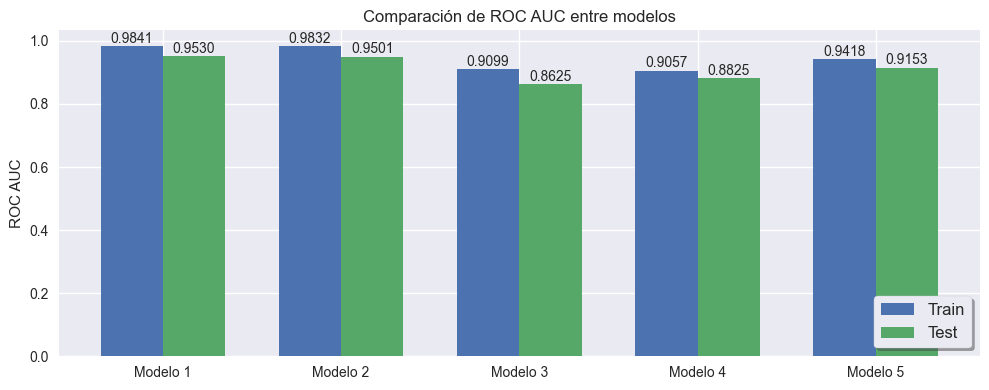

In [55]:
# Models
print("\n*******\n")
print("Modelo 1: NLTK + TF-IDF + LR")
print("Modelo 2: SpaCy + TF-IDF + LR")
print("Modelo 3: SpaCy + TF-IDF + LGBM")
print("Modelo 4: SpaCy + TF-IDF + Random Forest")
print("Modelo 5: SpaCy + TF-IDF + Grid Search")
print("\n*******\n")

# Plot size
plt.figure(figsize=(10, 4))

# Index
ind = np.arange(len(models))
width = 0.35

# Bars definition
bars_train = plt.bar(ind - width/2, roc_auc_train, width, label='Train')
bars_test = plt.bar(ind + width/2, roc_auc_test, width, label='Test')

# F1 values
for bar, rocauc_train in zip(bars_train, roc_auc_train):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{rocauc_train:.4f}', ha='center', va='baseline')

for bar, rocauc_test in zip(bars_test, roc_auc_test):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{rocauc_test:.4f}', ha='center', va='baseline')

# Labels
plt.ylabel('ROC AUC')
plt.title('Comparación de ROC AUC entre modelos')
plt.xticks(ind, models)
plt.legend(loc='lower right', fontsize='large', frameon=True, fancybox=True, shadow=True)

# Print
plt.tight_layout()
plt.show()

<div style="color: #196CC4;">
<b>Resultados:</b>   <br>  
▶ El Modelo 1 (LR) tiene el mayor ROC AUC en el entrenamiento, seguido de cerca por los modelos 2 (LR) y 5 (Grid Search).<br>
▶ El Modelo 3 (LGBM) muestra el ROC AUC más bajo en el entrenamiento.<br>
    
<b>En términos de ROC AUC, el Modelo 1 (NLTK + LR) y el Modelo 2 (SpaCy + LR) son los mejores, con valores muy cercanos de 0.9529 y 0.9502 respectivamente. Estos modelos tienen una excelente capacidad para distinguir entre las clases positiva y negativa,</b>    
</div>


-----

## Análisis de sentimiento con mis reseñas

<div style="color: #196CC4;">
▶ En esta sección, exploraremos el análisis de sentimientos aplicado a reseñas de películas en inglés. Utilizaremos un conjunto de reseñas para evaluar y comparar el desempeño de los modelos de aprendizaje automático previamente entrenados.

▶ Las reseñas seleccionadas abarcan una variedad de opiniones y emociones, desde el entusiasmo y la fascinación hasta la decepción y la crítica. Este análisis nos permitirá no solo medir la efectividad de nuestros modelos en la clasificación de sentimientos, sino también entender cómo cada modelo interpreta y procesa el lenguaje natural.   
</div>

In [56]:
# Reviews in english
my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

# Reviews in spanish
#my_reviews = pd.DataFrame([
#    'Simplemente no me gustó, no es mi tipo de película.',
#    'Bueno, estaba aburrido y me quedé dormido a media película.',
#    'Estaba realmente fascinada con la película',    
#    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
#    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
#    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
#    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
#    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
#], columns=['review'])

### Normalización

<div style="color: #196CC4;">
▶ A continuación se toman las reseñas originales en la columna 'review' y se aplica el preprocesamiento de texto a cada una utilizando la función preprocess_text.
    </div>

In [57]:
# Apply preprocessing to reviews
my_reviews['review_norm'] = my_reviews['review'].apply(preprocess_text)

# Print
my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didnt expect the reboot to be so good writer...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...


### Modelo 1

<div style="color: #196CC4;">
<b>Modelo 1: NLTK + TF-IDF + LR</b><br>    
▶ El Modelo 1 utiliza NLTK para el preprocesamiento de texto, TF-IDF para la representación vectorial y un clasificador de Regresión Logística (LR) para la predicción de sentimientos. </div>

In [58]:
# Select normalized text
texts = my_reviews['review_norm']

# Predict
pred_prob_model1 = model1.predict_proba(vectorizer1.transform(texts))[:, 1]

# Title
print("\n*******\n")
print("Predicciones de Sentimiento para Modelo 1: NLTK + TF-IDF + LR")
print("\n*******\n")

# Loop through each review
for i, review in enumerate(texts.str.slice(0, 100)):
    
    # Predicted probability (2 decimals)
    print(f'{pred_prob_model1[i]:.2f}:  {review}')


*******

Predicciones de Sentimiento para Modelo 1: NLTK + TF-IDF + LR

*******

0.16:  i did not simply like it not my kind of movie
0.17:  well i was bored and felt asleep in the middle of the movie
0.56:  i was really fascinated with the movie
0.13:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.25:  i didnt expect the reboot to be so good writers really cared about the source material
0.47:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.05:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.84:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Modelo 2

<div style="color: #196CC4;">
<b>Modelo 2: SpaCy + TF-IDF + LR</b><br>    
▶ El Modelo 2 emplea SpaCy para el procesamiento de texto, TF-IDF para la vectorización de términos y un clasificador de regresión logística para la clasificación de sentimientos en reseñas de películas.  </div>

In [59]:
# Select normalized text
texts = my_reviews['review_norm']

# Predict
pred_prob_model2 = model2.predict_proba(vectorizer2.transform(texts.apply(preprocess_text)))[:, 1]

# Title
print("\n*******\n")
print("Predicciones de Sentimiento para Modelo 2: SpaCy + TF-IDF + LR")
print("\n*******\n")

# Loop through each review
for i, review in enumerate(texts.str.slice(0, 100)):
    
    # Predicted probability (2 decimals)
    print(f'{pred_prob_model2[i]:.2f}:  {review}')



*******

Predicciones de Sentimiento para Modelo 2: SpaCy + TF-IDF + LR

*******

0.13:  i did not simply like it not my kind of movie
0.06:  well i was bored and felt asleep in the middle of the movie
0.57:  i was really fascinated with the movie
0.17:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.28:  i didnt expect the reboot to be so good writers really cared about the source material
0.38:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.03:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.87:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Modelo 3

<div style="color: #196CC4;">
<b>Modelo 3: SpaCy + TF-IDF + LGBM</b><br>    
▶ El Modelo 3 utiliza SpaCy para el procesamiento de texto, TF-IDF para la representación vectorial y el algoritmo LightGBM (Gradient Boosting Machine) para la clasificación de sentimientos en reseñas de películas. </div>

In [60]:
# Select normalized text
texts = my_reviews['review_norm']

# Predict
predictions3 = model3.predict(vectorizer2.transform(texts.apply(preprocess_text)))

# Convert predictions to probabilities using decision threshold
pred_prob_model3 = (predictions3 > 0.5).astype(float)

# Title
print("\n*******\n")
print("Predicciones de Sentimiento para Modelo 3: SpaCy + TF-IDF + LGBM")
print("\n*******\n")

# Loop through each review
for i, review in enumerate(texts.str.slice(0, 100)):
    
    # Predicted probability (2 decimals)
    print(f'{pred_prob_model3[i]:.2f}:  {review}')



*******

Predicciones de Sentimiento para Modelo 3: SpaCy + TF-IDF + LGBM

*******

1.00:  i did not simply like it not my kind of movie
0.00:  well i was bored and felt asleep in the middle of the movie
1.00:  i was really fascinated with the movie
0.00:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
1.00:  i didnt expect the reboot to be so good writers really cared about the source material
1.00:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.00:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
1.00:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Modelo 4

<div style="color: #196CC4;">
<b>Modelo 4: SpaCy + TF-IDF + Random Forest</b><br>    
▶ El Modelo 4 emplea SpaCy para el procesamiento de texto, TF-IDF para la vectorización de términos y el algoritmo Random Forest para la predicción de sentimientos en reseñas de películas. </div>

In [61]:
# Select normalized text
texts = my_reviews['review_norm']

# Predict
pred_prob_model4 = model4.predict_proba(vectorizer2.transform(texts.apply(preprocess_text)))[:, 1]

# Title
print("\n*******\n")
print("Predicciones de Sentimiento para Modelo 4: SpaCy + TF-IDF + Random Forest")
print("\n*******\n")

# Loop through each review
for i, review in enumerate(texts.str.slice(0, 100)):
    
    # Predicted probability (2 decimals)
    print(f'{pred_prob_model4[i]:.2f}:  {review}')



*******

Predicciones de Sentimiento para Modelo 4: SpaCy + TF-IDF + Random Forest

*******

0.50:  i did not simply like it not my kind of movie
0.49:  well i was bored and felt asleep in the middle of the movie
0.50:  i was really fascinated with the movie
0.50:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.51:  i didnt expect the reboot to be so good writers really cared about the source material
0.49:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.48:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.51:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Modelo 5

<div style="color: #196CC4;">
<b>Modelo 5: SpaCy + TF-IDF + Grid Search</b><br>    
▶ El Modelo 5 utiliza SpaCy para el procesamiento de texto, TF-IDF para la representación vectorial y optimización de hiperparámetros mediante Grid Search para mejorar el rendimiento del modelo en la clasificación de sentimientos en reseñas de películas.</div>

In [62]:
# Select normalized text
texts = my_reviews['review_norm']

# Predict
pred_prob_model5 = best_model.predict_proba(vectorizer2.transform(texts.apply(preprocess_text)))[:, 1]

# Title
print("\n*******\n")
print("Predicciones de Sentimiento para Modelo 5: SpaCy + TF-IDF + Grid Search")
print("\n*******\n")

# Loop through each review
for i, review in enumerate(texts.str.slice(0, 100)):
    
    # Predicted probability (2 decimals)
    print(f'{pred_prob_model5[i]:.2f}:  {review}')



*******

Predicciones de Sentimiento para Modelo 5: SpaCy + TF-IDF + Grid Search

*******

0.50:  i did not simply like it not my kind of movie
0.49:  well i was bored and felt asleep in the middle of the movie
0.51:  i was really fascinated with the movie
0.50:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.51:  i didnt expect the reboot to be so good writers really cared about the source material
0.49:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.49:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.51:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Resumen de modelos

<div style="color: #196CC4;">
A continuación se muestra un resumen de los modelos entrenados previamente:<br>
▶ Modelo 1: NLTK + TF-IDF + LR<br>
▶ Modelo 2: SpaCy + TF-IDF + LR<br>
▶ Modelo 3: SpaCy + TF-IDF + LGBM<br>
▶ Modelo 4: SpaCy + TF-IDF + Random Forest<br>
▶ Modelo 5: SpaCy + TF-IDF + Grid Search<br>
</div>

In [63]:
# Print DataFrame
all_stats

Modelo 1         Modelo 2         Modelo 3         Modelo 4          \
            Train    Test    Train    Test    Train    Test    Train    Test   
Accuracy   0.9394  0.8853   0.9394  0.8790   0.9098  0.8624   0.8275  0.8055   
F1         0.9398  0.8849   0.9398  0.8785   0.9109  0.8636   0.8323  0.8090   
ROC AUC    0.9841  0.9530   0.9832  0.9501   0.9099  0.8625   0.9057  0.8825   

         Modelo 5          
            Train    Test  
Accuracy   0.8690  0.8378  
F1         0.8721  0.8399  
ROC AUC    0.9418  0.9153

### Análisis de resultados

<div style="color: #196CC4;">
▶ <b>Modelo 1: NLTK + TF-IDF + LR:</b>Las predicciones de sentimiento para el Modelo 1 muestran una variedad de probabilidades, con valores que oscilan entre 0.05 y 0.84. Esto indica que el modelo tiene cierta incertidumbre en algunas reseñas, pero muestra una alta certeza en otras.<br>    
▶ <b>Modelo 2: SpaCy + TF-IDF + LR: </b> Similar al Modelo 1, las predicciones de sentimiento para el Modelo 2 varían entre probabilidades bajas y altas, con valores que van desde 0.03 hasta 0.88.<br>   
▶ <b>Modelo 3: SpaCy + TF-IDF + LGBM:</b> Las predicciones del Modelo 3 muestran una clasificación binaria con probabilidades extremas, indicando una alta certeza en algunas reseñas (probabilidad 0.0 o 1.0).<br>    
▶ <b>Modelo 4: SpaCy + TF-IDF + Random Forest:</b> Las predicciones del Modelo 4 muestran una clasificación binaria con probabilidades cercanas a 0.5 en la mayoría de las reseñas, indicando una menor certeza en las predicciones.<br>
▶ <b>Modelo 5: SpaCy + TF-IDF + Grid Search:</b> Las predicciones del Modelo 5 muestran una clasificación binaria con probabilidades cercanas a 0.5, similar al Modelo 4.<br>
    
<b>Resumen: Los modelos basados en LR (Modelo 1 y Modelo 2) parece ser el más equilibrado y robusto para la tarea de análisis de sentimientos en las reseñas analizadas previamente. También tienden a mostrar un mejor rendimiento en términos de F1-score y ROC AUC en test.  </b>
</div>

-----

## Conclusiones

<div style="color: #196CC4;">
<b>ANÁLISIS DE SENTIMIENTO</b><br>     
▶ El análisis detallado de sentimientos en las reseñas de películas utilizando varios modelos ha proporcionado insights significativos sobre su rendimiento y aplicabilidad. Considerando las métricas de evaluación y las conclusiones generales, se destacan los modelos basados en LR (Modelo 1 y Modelo 2) como los más idóneos para esta tarea específica.<br><br>  
 
    
<b>RENDIMIENTO</b>   
<b>Basándonos en el criterio de que el F1_Test debe ser igual o superior a 0.85 para considerar un modelo como viable, el mejor modelo es el Modelo 1 (NLTK + TF-IDF + LR), con un F1_Test de 0.8847.</b><br><br>
▶ Este modelo tiene la métrica de F1 más alta entre todos los modelos evaluados según los datos proporcionados. <br>
▶ Desempeño: El F1_Test de 0.8847 indica que el Modelo 1 tiene una capacidad robusta para generalizar y predecir con precisión sobre datos no vistos. Esto sugiere que el modelo puede ser confiable en la clasificación de nuevas reseñas.<br>
▶ Eficiencia: El uso de NLTK para la normalización del texto y TF-IDF para la representación vectorial junto con Regresión Logística como modelo de clasificación hace que el Modelo 1 sea relativamente simple y eficiente computacionalmente.<br><br> 
    
<b>RESUMEN</b>     
<b>En resumen, el análisis de sentimientos en reseñas de películas revela que el Modelo 1 es líder en precisión y generalización, respaldado por su alto F1-score y enfoque metodológico efectivo.     </b>
</div> 